In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
test_df = pd.read_csv('/content/drive/My Drive/test_df.csv')
train_df = pd.read_csv('/content/drive/My Drive/train_df.csv')

In [6]:
train_df.columns

Index(['domain', 'country_code', 'num_funding_rounds', 'total_funding_usd',
       'founded_on', 'last_funding_on', 'closed_on', 'employee_count',
       'num_exits', 'b_round_raised_amount_usd', 'ipo_money_raised_usd',
       'is_tech', 'b_round_age', 'ipo_age', 'acquired_age', 'target'],
      dtype='object')

In [7]:
train_df.shape, test_df.shape

((316566, 16), (105522, 16))

In [8]:
y_train = train_df['target']
X_train = train_df.drop(['target'], axis = 1)

y_test = test_df['target']
X_test = test_df.drop(['target'], axis = 1)

In [12]:
len(y_train[y_train == 1]) / len(y_train[y_train == 0])

0.0646349214890347

In [13]:
len(y_train[y_train == 0]) / len(y_train[y_train == 1])

15.471512565690203

In [14]:
param_grid = {'eta': [0.001, 0.01, 0.1],
              'max_depth': [5, 10],
              'scale_pos_weight': [0.06, 1, 16]
              }
clf = xgb.XGBClassifier(n_estimators = 100)
gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=5, verbose=3)

gridsearch.fit(X_train, y_train)
gridsearch.cv_results_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END eta=0.001, max_depth=5, scale_pos_weight=0.06;, score=0.885 total time=  21.2s
[CV 2/5] END eta=0.001, max_depth=5, scale_pos_weight=0.06;, score=0.898 total time=  28.0s
[CV 3/5] END eta=0.001, max_depth=5, scale_pos_weight=0.06;, score=0.894 total time=  21.0s
[CV 4/5] END eta=0.001, max_depth=5, scale_pos_weight=0.06;, score=0.892 total time=  20.8s
[CV 5/5] END eta=0.001, max_depth=5, scale_pos_weight=0.06;, score=0.888 total time=  21.1s
[CV 1/5] END eta=0.001, max_depth=5, scale_pos_weight=1;, score=0.956 total time=  22.9s
[CV 2/5] END eta=0.001, max_depth=5, scale_pos_weight=1;, score=0.957 total time=  21.4s
[CV 3/5] END eta=0.001, max_depth=5, scale_pos_weight=1;, score=0.957 total time=  21.5s
[CV 4/5] END eta=0.001, max_depth=5, scale_pos_weight=1;, score=0.957 total time=  21.6s
[CV 5/5] END eta=0.001, max_depth=5, scale_pos_weight=1;, score=0.958 total time=  21.4s
[CV 1/5] END eta=0.001, max_depth=

{'mean_fit_time': array([22.23883038, 21.52157722, 20.92474394, 37.49796576, 46.05341454,
        43.92359848, 28.23604345, 21.30415258, 21.22422938, 37.06857715,
        43.38985963, 43.1251687 , 21.05957117, 21.27891898, 21.25234847,
        37.54586258, 43.52861958, 43.47066498]),
 'mean_score_time': array([0.20029354, 0.22974648, 0.23844972, 0.28671541, 0.52551041,
        0.4581708 , 0.26452389, 0.23307676, 0.24201922, 0.28500338,
        0.46224432, 0.45563006, 0.20403056, 0.23171029, 0.24135489,
        0.2871172 , 0.47059865, 0.46111789]),
 'mean_test_score': array([0.89144288, 0.95699259, 0.93276775, 0.91014385, 0.95663639,
        0.9303013 , 0.89144288, 0.95699259, 0.93276775, 0.91014385,
        0.95663639, 0.9303013 , 0.89144288, 0.95699259, 0.93276775,
        0.91014385, 0.95663639, 0.9303013 ]),
 'param_eta': masked_array(data=[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01,
                    0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              m

In [15]:
print('XGB','\nbest parameters:', gridsearch.best_params_, '\nbest score:', gridsearch.best_score_)

XGB 
best parameters: {'eta': 0.001, 'max_depth': 5, 'scale_pos_weight': 1} 
best score: 0.9569925862796618


In [16]:
best_clf = xgb.XGBClassifier(n_estimators = 100, eta=0.001, max_depth=5, scale_pos_weight=1) # best params

best_clf.fit(X_train, y_train)
y_test_pred = best_clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_test_pred),
      '\nF1-score:', f1_score(y_test, y_test_pred),
      '\nROC-AUC score:', roc_auc_score(y_test, y_test_pred))

Accuracy: 0.9948257235458009 
F1-score: 0.9568584070796461 
ROC-AUC score: 0.9699769788372041


In [17]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import average_precision_score

In [18]:
print('Average precision:', average_precision_score(y_test, y_test_pred), 
      '\nCohen-Kappa coefficient:', cohen_kappa_score(y_test, y_test_pred),
      '\nMatthews coeficient:', matthews_corrcoef(y_test, y_test_pred))

Average precision: 0.919369716965737 
Cohen-Kappa coefficient: 0.9541069851558021 
Matthews coeficient: 0.9542472765676976


In [11]:
probs = best_clf.predict_proba(X_test)
probs

array([[0.9964757 , 0.0035243 ],
       [0.9986144 , 0.00138565],
       [0.99000853, 0.00999146],
       ...,
       [0.9983642 , 0.00163577],
       [0.9961427 , 0.00385729],
       [0.9951352 , 0.00486481]], dtype=float32)

In [19]:
probs.T[1] # уверенность модели в положительном классе

array([0.0035243 , 0.00138565, 0.00999146, ..., 0.00163577, 0.00385729,
       0.00486481], dtype=float32)

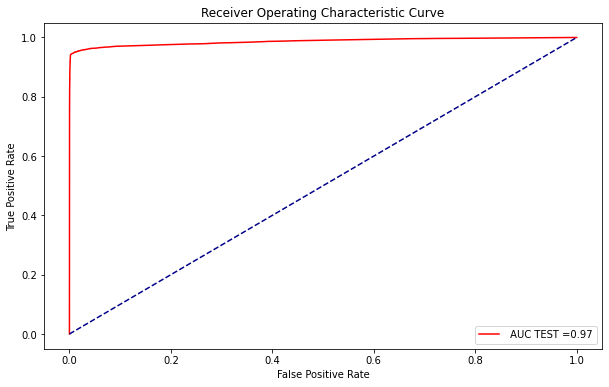

In [21]:
fpr, tpr, _ = roc_curve(y_test, probs.T[1])

plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, color='red', label=" AUC TEST ="+str(round(roc_auc_score(y_test, y_test_pred),3)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.savefig('logreg.png')
plt.show()


In [22]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit_transform(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [26]:
param_grid = {'eta': [0.001, 0.01, 0.1],
              'max_depth': [5, 10],
              'scale_pos_weight': [1, 15]
              }
clf = xgb.XGBClassifier(n_estimators = 100)
gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=5, verbose=3)

gridsearch.fit(X_scaled_train, y_train)
gridsearch.cv_results_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END eta=0.001, max_depth=5, scale_pos_weight=1;, score=0.956 total time=  26.0s
[CV 2/5] END eta=0.001, max_depth=5, scale_pos_weight=1;, score=0.957 total time=  47.1s
[CV 3/5] END eta=0.001, max_depth=5, scale_pos_weight=1;, score=0.957 total time=  34.5s
[CV 4/5] END eta=0.001, max_depth=5, scale_pos_weight=1;, score=0.957 total time=  23.8s
[CV 5/5] END eta=0.001, max_depth=5, scale_pos_weight=1;, score=0.958 total time=  22.7s
[CV 1/5] END eta=0.001, max_depth=5, scale_pos_weight=15;, score=0.937 total time=  21.7s
[CV 2/5] END eta=0.001, max_depth=5, scale_pos_weight=15;, score=0.936 total time=  22.1s
[CV 3/5] END eta=0.001, max_depth=5, scale_pos_weight=15;, score=0.935 total time=  22.2s
[CV 4/5] END eta=0.001, max_depth=5, scale_pos_weight=15;, score=0.940 total time=  22.0s
[CV 5/5] END eta=0.001, max_depth=5, scale_pos_weight=15;, score=0.938 total time=  21.7s
[CV 1/5] END eta=0.001, max_depth=10, scale_

{'mean_fit_time': array([30.55334558, 21.67772398, 46.1637126 , 45.73277516, 22.19029937,
        22.11392474, 46.75862484, 45.9841795 , 23.30054183, 22.39659901,
        46.23529835, 46.44981351]),
 'mean_score_time': array([0.26490455, 0.23821635, 0.48015547, 0.48272877, 0.23010983,
        0.23819742, 0.47775879, 0.47395039, 0.23431044, 0.24169807,
        0.4799067 , 0.46336551]),
 'mean_test_score': array([0.95699259, 0.93736941, 0.95666406, 0.93338211, 0.95699259,
        0.93736941, 0.95666406, 0.93338211, 0.95699259, 0.93736941,
        0.95666406, 0.93338211]),
 'param_eta': masked_array(data=[0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01,
                    0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 5, 10, 10, 5, 5, 10, 10, 5, 5, 10, 10],
              mask=[False, False, Fals

In [27]:
print('XGB','\nbest parameters:', gridsearch.best_params_, '\nbest score:', gridsearch.best_score_)

XGB 
best parameters: {'eta': 0.001, 'max_depth': 5, 'scale_pos_weight': 1} 
best score: 0.9569925862796618


In [28]:
best_clf = xgb.XGBClassifier(n_estimators = 100, eta=0.001, max_depth=5, scale_pos_weight=1) # best params

best_clf.fit(X_scaled_train, y_train)
y_test_pred = best_clf.predict(X_scaled_test)

print('Accuracy:', accuracy_score(y_test, y_test_pred),
      '\nF1-score:', f1_score(y_test, y_test_pred),
      '\nROC-AUC score:', roc_auc_score(y_test, y_test_pred))

Accuracy: 0.9948257235458009 
F1-score: 0.9568584070796461 
ROC-AUC score: 0.9699769788372041


In [ ]:
print('Average precision:', average_precision_score(y_test, y_test_pred), 
      '\nCohen-Kappa coefficient:', cohen_kappa_score(y_test, y_test_pred),
      '\nMatthews coeficient:', matthews_corrcoef(y_test, y_test_pred))

In [29]:
probs = best_clf.predict_proba(X_scaled_test)
probs

array([[0.9964757 , 0.0035243 ],
       [0.9986144 , 0.00138565],
       [0.99000853, 0.00999146],
       ...,
       [0.9983642 , 0.00163577],
       [0.9961427 , 0.00385729],
       [0.9951352 , 0.00486481]], dtype=float32)

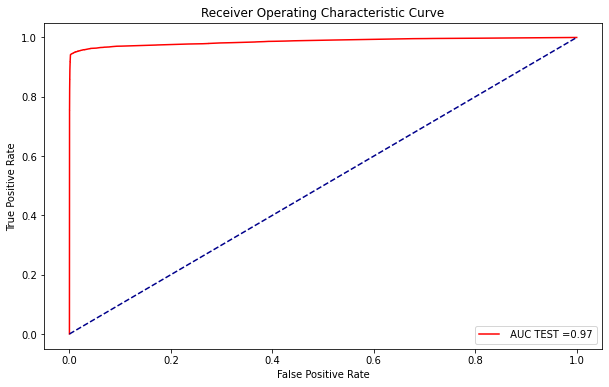

In [30]:
fpr, tpr, _ = roc_curve(y_test, probs.T[1])

plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, color='red', label=" AUC TEST ="+str(round(roc_auc_score(y_test, y_test_pred),3)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.savefig('logreg.png')
plt.show()
